In [35]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

  Using cached wordcloud-1.9.1.1.tar.gz (222 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build wordcloud


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [20 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\color_from_image.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\tokenization.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\wordcloud.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\wordcloud_cli.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\_version.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\__init__.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\__main__.py -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\stopwords -> build\lib.win-amd64-cpython-311\wordcloud
  copying wordcloud\DroidSansMono.ttf -> build\lib.win-amd64-cpython-311\wordcloud
  UPDATING build\lib.win-amd64-cp

In [36]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Souji\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [37]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [38]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

Please enter keyword or hashtag to search: UCM
Please enter how many tweets to analyze: 200
total number:  200
positive number:  22
negative number:  17
neutral number:  161


In [39]:
tweet_list[0:20]

,0
0,RT @Indie5051: Oficialmente la mejor trilogía ...
1,"RT @Multiverso_GK: Y así cierra, una de las me..."
2,RT @Indie5051: Oficialmente la mejor trilogía ...
3,RT @Indie5051: Oficialmente la mejor trilogía ...
4,@ranastur El UCM como concepto estaba muy bien...
5,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
6,RT @Indie5051: Oficialmente la mejor trilogía ...
7,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...
8,#GuardianesdelaGalaxiaVol3 es una montaña rusa...
9,RT @Indie5051: Oficialmente la mejor trilogía ...


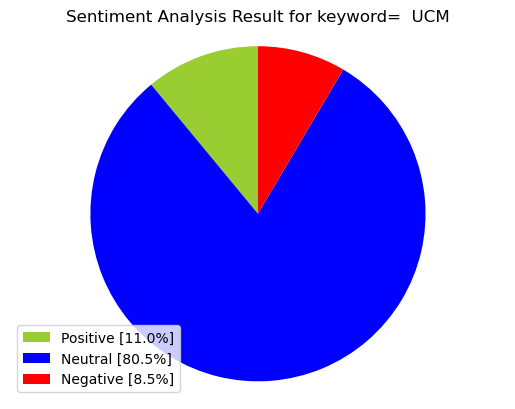

In [40]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [41]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [42]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @Indie5051: Oficialmente la mejor trilogía ...,RT @Indie5051: Oficialmente la mejor trilogía ...
1,"RT @Multiverso_GK: Y así cierra, una de las me...","RT @Multiverso_GK: Y así cierra, una de las me..."
4,@ranastur El UCM como concepto estaba muy bien...,@ranastur El UCM como concepto estaba muy bien...
5,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...
7,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...
8,#GuardianesdelaGalaxiaVol3 es una montaña rusa...,#GuardianesdelaGalaxiaVol3 es una montaña rusa...
10,"Sin duda, un buen cierre para la trilogía, qui...","Sin duda, un buen cierre para la trilogía, qui..."
11,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
15,RT @peterjordan100: Saiu video do Raluca e a g...,RT @peterjordan100: Saiu video do Raluca e a g...
17,RT @BIBLIOTECACCINF: El periodista @manuelrico...,RT @BIBLIOTECACCINF: El periodista @manuelrico...


In [43]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @Indie5051: Oficialmente la mejor trilogía ...,oficialmente la mejor trilog a del ucm
1,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...
4,@ranastur El UCM como concepto estaba muy bien...,el ucm como concepto estaba muy bien pero e...
5,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm
7,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,abro hilo 7 mitos sobre el vph xii concurs...
8,#GuardianesdelaGalaxiaVol3 es una montaña rusa...,guardianesdelagalaxiavol3 es una monta a rusa...
10,"Sin duda, un buen cierre para la trilogía, qui...",sin duda un buen cierre para la trilog a qui...
11,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
15,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...
17,RT @BIBLIOTECACCINF: El periodista @manuelrico...,el periodista colaborador de infolibre r...


In [44]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Indie5051: Oficialmente la mejor trilogía ...,oficialmente la mejor trilog a del ucm,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
1,"RT @Multiverso_GK: Y así cierra, una de las me...",y as cierra una de las mejores trilog as de...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
4,@ranastur El UCM como concepto estaba muy bien...,el ucm como concepto estaba muy bien pero e...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.5,0.500000,positive,0.000,0.625,0.375,0.2023
7,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,abro hilo 7 mitos sobre el vph xii concurs...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
8,#GuardianesdelaGalaxiaVol3 es una montaña rusa...,guardianesdelagalaxiavol3 es una monta a rusa...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
10,"Sin duda, un buen cierre para la trilogía, qui...",sin duda un buen cierre para la trilog a qui...,0.0,0.000000,negative,0.146,0.854,0.000,-0.5574
11,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.0,0.066667,negative,0.165,0.688,0.147,-0.1027
15,RT @peterjordan100: Saiu video do Raluca e a g...,saiu video do raluca e a galera ta mais hypad...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000
17,RT @BIBLIOTECACCINF: El periodista @manuelrico...,el periodista colaborador de infolibre r...,0.0,0.000000,neutral,0.000,1.000,0.000,0.0000


In [45]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [46]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [47]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,39,65.0
positive,12,20.0
negative,9,15.0


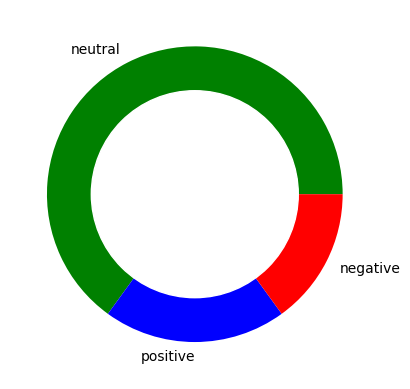

In [48]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [49]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



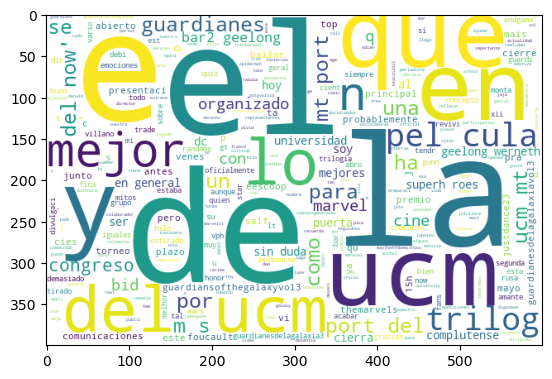

In [50]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

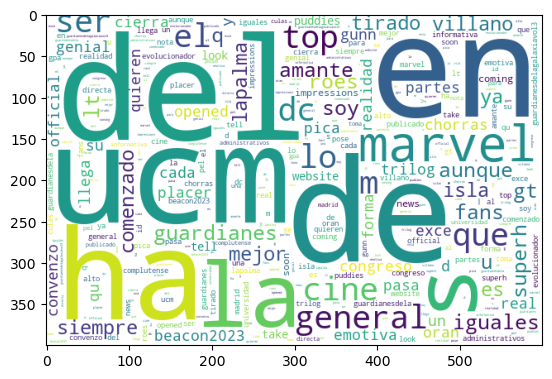

In [51]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

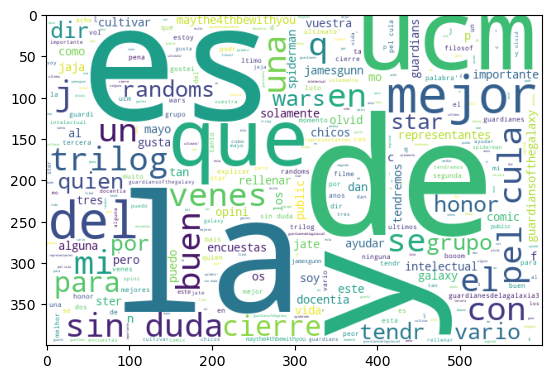

In [52]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

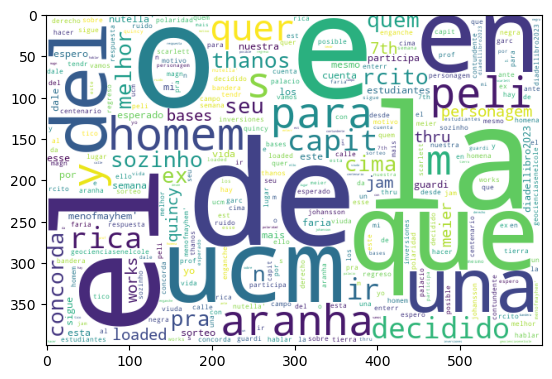

In [20]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)